In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0,6)
true_rel = 2
y = true_rel *x

In [3]:
noise = np.random.normal(0,1,len(x))
y = y+noise

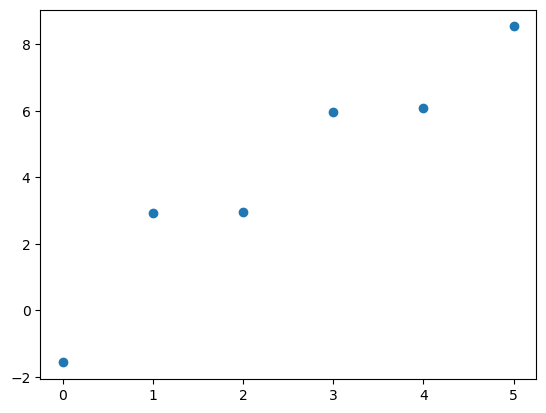

In [11]:
plt.plot(x,y,'.',ms=12);

In [12]:
x = np.reshape(x,[len(x),1])
y = np.reshape(y,[len(y),1])

In [13]:
# Fit the (Ordinary) Least Squares best fit line using numpy
#   This gives us a fit value (theta), and residuals (how much error we have in this fit)
theta, residuals, _, _ = np.linalg.lstsq(x, y, rcond=None)

# Pull out theta value from array
theta = theta[0][0]

In [14]:
# Check what the OLS derived solution for theta is:
print('Estimated theta value is: {:1.4f}'.format(theta))

Estimated theta value is: 1.7044


In [15]:
# Check how good our OLS solution is
print('The true relationship between y & x is: \t{:1.4f}'.format(true_rel))
print('OLS calculated relationship between y & x is: \t{:1.4f}'.format(theta))

The true relationship between y & x is: 	2.0000
OLS calculated relationship between y & x is: 	1.7044


In [16]:
# Check what the residuals are. Residuals are the error of the model fit
print('The residuals for the model fit are: \t{:1.4f}'.format(residuals[0]))

The residuals for the model fit are: 	5.4315


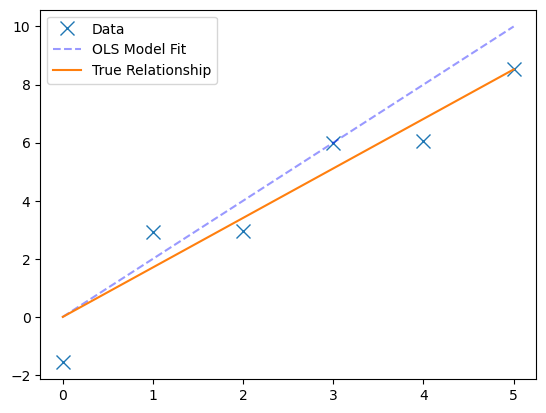

In [17]:
# Plot the raw data, with the true underlying relationship, and the OLS fit
fig, ax = plt.subplots(1)
ax.plot(x, y, 'x', markersize=10, label='Data')
ax.plot(x, 2*x, '--b', alpha=0.4, label='OLS Model Fit')
ax.plot(x, theta*x, label='True Relationship')
ax.legend();

Predict New Data

In [18]:
# With our model, we can predict the value of a new 'x' datapoint
new_x = 2.5
pred_y = theta * new_x
print('The prediction for a new x of {} is {:1.3f}'.format(new_x, pred_y))

The prediction for a new x of 2.5 is 4.261


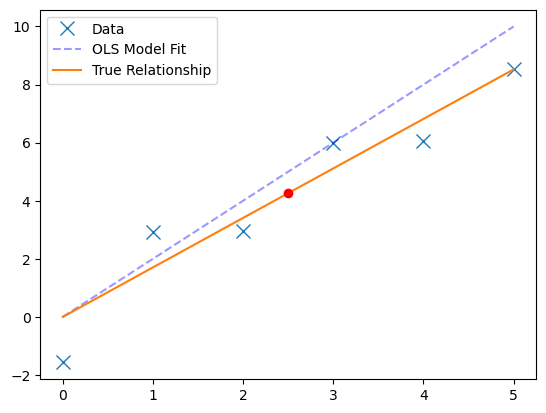

In [19]:
ax.plot(new_x, pred_y, 'or')
fig

# New Model

In [20]:
# Calculate model predictions for our observed data points
preds = theta * x

In [21]:
# Re-calculate the residuals 'by hand'
error = np.sum(np.subtract(preds, y) ** 2)

In [22]:
# Check that our residuals calculation matches the scipy implementation
print('Error, returned by the model \t\t: {:1.4f}'.format(residuals[0]))
print('Error, as recalculated residuals \t: {:1.4f}'.format(error))

Error, returned by the model 		: 5.4315
Error, as recalculated residuals 	: 5.4315
